# 1. Import Libraries and load Dataset

## 1.1. Import libraries

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torchtext
import os
import numpy as np
import pandas as pd
import spacy
import spacy.cli
spacy.cli.download("en_core_web_sm")
import timm
import matplotlib.pyplot as plt

from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from collections import Counter
from torchvision import transforms

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
torchtext.__version__

'0.17.1+cpu'

## 1.2. Load Dataset

In [ ]:
!unzip -q vqa_coco_dataset.zip

In [ ]:
# !chmod 644 /content/vqa_coco_dataset.zip

In [ ]:
# !ls -l /content/vqa_coco_dataset.zip  # Check file size
# !md5sum /content/vqa_coco_dataset.zip  # Calculate MD5 checksum

In [ ]:
# Load Validation set
val_data = []
val_set_path = "./vaq2.0.DevImages.txt"

with open (val_set_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        temp = line.split('\t')
        qa = temp[1].split('?')

        if len(qa) == 3:
            answer = qa[2].strip()
        else:
            answer = qa[1].strip()

        data_sample = {
            'image_path': temp[0][:-2],
            'question': qa[0] + '?',
            'answer': answer
        }
        val_data.append(data_sample)

print (len(val_data))

1952


In [ ]:
val_data

[{'image_path': 'COCO_val2014_000000262175.jpg',
  'question': 'Is this a designer tie ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000393284.jpg',
  'question': 'Is this man snowboarding ?',
  'answer': 'yes'},
 {'image_path': 'COCO_val2014_000000000133.jpg',
  'question': 'Is this a child room ?',
  'answer': 'yes'},
 {'image_path': 'COCO_val2014_000000000133.jpg',
  'question': 'Could this be child room ?',
  'answer': 'yes'},
 {'image_path': 'COCO_val2014_000000240323.jpg',
  'question': 'Is this a vegetarian meal ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000524450.jpg',
  'question': 'Could this be tour bus ?',
  'answer': 'yes'},
 {'image_path': 'COCO_val2014_000000262386.jpg',
  'question': 'Is this a metal toilet ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000262386.jpg',
  'question': 'Is this a private bathroom ?',
  'answer': 'yes'},
 {'image_path': 'COCO_val2014_000000000294.jpg',
  'question': 'Is this a home kitchen ?',
  'answer': 'ye

In [ ]:
train_data = []
train_set_path = './vaq2.0.TrainImages.txt'

with open(train_set_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        temp = line.split('\t')
        qa = temp[1].split('?')

        if len(qa) == 3:
            answer = qa[2].strip()
        else:
            answer = qa[1].strip()

        data_sample = {
            'image_path': temp[0][:-2],
            'question': qa[0] + '?',
            'answer': answer
        }
        train_data.append(data_sample)

In [ ]:
train_data[0]

{'image_path': 'COCO_val2014_000000393225.jpg',
 'question': 'Is this a creamy soup ?',
 'answer': 'no'}

In [ ]:
# Load Test set
test_data = []
test_data_path = './vaq2.0.TestImages.txt'

with open (test_data_path, 'r') as f:
    lines = f.readlines()

    for line in lines:
        temp = line.split('\t')
        img_path = temp[0][:-2]
        qa = temp[1].split('?')

        question = qa[0].strip()

        if len(qa) == 3:
          ans = qa[2].strip()
        else:
          ans = qa[1].strip()

        data_sample = {
            'image_path': temp[0][:-2],
            'question': qa[0] + '?',
            'answer': ans
        }


        test_data.append(data_sample)

print (len(test_data))



2022


In [ ]:
test_data

[{'image_path': 'COCO_val2014_000000262162.jpg',
  'question': 'Are there any boxes in the room ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000393277.jpg',
  'question': 'Are there any any tour buses ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000393284.jpg',
  'question': 'Is this person flying ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000262376.jpg',
  'question': 'Is this a big building ?',
  'answer': 'yes'},
 {'image_path': 'COCO_val2014_000000524611.jpg',
  'question': 'Could this be parking lot for bikes ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000524621.jpg',
  'question': 'Is this a man made exhibit ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000524621.jpg',
  'question': 'Is this a zoo ?',
  'answer': 'no'},
 {'image_path': 'COCO_val2014_000000000357.jpg',
  'question': 'Is this a professional game ?',
  'answer': 'yes'},
 {'image_path': 'COCO_val2014_000000262608.jpg',
  'question': 'Is this a sandwich with a b

# 2. Data Preprocessing

## 2.1. Create Vocabulary

In [ ]:
eng = spacy.load("en_core_web_sm")

def get_tokens (data_iter):
    for sample in data_iter:
        question = sample['question']

        yield [token.text for token in eng.tokenizer(question)]

vocab = build_vocab_from_iterator(
    get_tokens(train_data),
    min_freq= 1,
    specials = ['<pad>', '<sos>', '<eos>', '<unk>'],
    special_first = True
)
vocab.set_default_index(vocab['<unk>'])

In [ ]:
vocab

Vocab()

## 2.2. Text Tokenization

In [ ]:
def tokenize (question, max_seq_len):
  tokens = [token.text for token in eng.tokenizer(question)]
  sequence = [vocab[token] for token in tokens]
  if len(sequence) < max_seq_len:
    sequence += [vocab['<pad>']] * (max_seq_len - len(sequence))
  else:
    sequence = sequence[:max_seq_len]

  return sequence

In [ ]:
example_question = "is this a picture or not"
example_question_tokenized =  tokenize (example_question, 5)
example_question_tokenized

[207, 5, 7, 16, 1397]

## 2.3. Class Mapping

In [ ]:
classes = set([sample['answer'] for sample in train_data])
classes_to_idx = {
    cls_name: idx for idx, cls_name in enumerate (classes)
}
idx_to_classes = {
    idx: cls_name for idx, cls_name in enumerate (classes)
}
print (idx_to_classes)

{0: 'yes', 1: 'no'}


# 3. Create Pytorch Dataset

## 3.1. Define class for custom Pytorch Dataset


*   Initialization: Set up the dataset with necessary parameters, including data list (image paths, questions, and answers), class-to-index mapping for answers, maximum sequence length for questions, image transformations, and the root directory for images.
*   Dataset Size: Through the __len__ method, it provides the total number of entries in the dataset, essential for iterating over the dataset in training and evaluation.
*   Data Retrieval: The __getitem__ method fetches a specific data point by its index. It loads and optionally transforms the image, tokenizes and pads/truncates the question to a fixed length, and converts the answer into a numerical label. This method returns a tuple of the processed image, question, and label, ready for use in model training or inference.

In [ ]:
# Image transformation: Resize, Convert to Tensor, Normalization
transform = transforms.Compose([
 transforms.Resize((224, 224)),
 transforms.ToTensor(),
 transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
class VQADataset(Dataset):
  # Initialization
    def __init__(
        self,
        data,
        classes_to_idx,
        max_seq_len=20,
        transform=None,
        root_dir='val2014-resised'
    ):
        self.transform = transform
        self.data = data
        self.max_seq_len = max_seq_len
        self.root_dir = root_dir
        self.classes_to_idx = classes_to_idx

  # Dataset Size:
    def __len__(self):
        return len(self.data)

  # Data Retrieval
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.data[index]['image_path'])
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)

        question = self.data[index]['question']
        question = tokenize(question, self.max_seq_len)
        question = torch.tensor(question, dtype=torch.long)

        label = self.data[index]['answer']
        label = classes_to_idx[label]
        label = torch.tensor(label, dtype=torch.long)

        return img, question, label

In [ ]:
train_dataset = VQADataset(
    train_data,
    classes_to_idx=classes_to_idx,
    transform=transform
)
val_dataset = VQADataset(
    val_data,
    classes_to_idx=classes_to_idx,
    transform=transform
)
test_dataset = VQADataset(
    test_data,
    classes_to_idx=classes_to_idx,
    transform=transform
)

In [ ]:
train_dataset[0]

(tensor([[[ 0.9132,  1.0331,  1.1872,  ..., -1.6384, -1.6213, -1.6213],
          [ 0.9646,  0.9988,  1.1187,  ..., -1.6213, -1.6213, -1.6213],
          [ 1.0502,  0.9988,  1.1015,  ..., -1.6042, -1.6042, -1.6042],
          ...,
          [-1.0219, -0.4568,  0.0227,  ...,  1.6495,  1.8379,  1.5297],
          [-0.0801, -0.0458,  0.0912,  ...,  1.3755,  1.3927,  1.5810],
          [ 0.0227,  0.0569,  0.0741,  ...,  0.8789,  1.5125,  1.7523]],
 
         [[ 0.6779,  0.8004,  0.8880,  ..., -1.3704, -1.3880, -1.3880],
          [ 0.7304,  0.7654,  0.8529,  ..., -1.3529, -1.3880, -1.3880],
          [ 0.8179,  0.7654,  0.8354,  ..., -1.3354, -1.3354, -1.3354],
          ...,
          [-1.1604, -0.5476, -0.0749,  ...,  1.4132,  1.5707,  1.2206],
          [-0.0924, -0.0574,  0.0826,  ...,  1.0455,  1.1155,  1.3606],
          [ 0.0826,  0.1176,  0.0651,  ...,  0.4503,  1.2731,  1.6057]],
 
         [[ 0.1825,  0.3393,  0.5311,  ..., -1.1247, -1.1247, -1.1247],
          [ 0.2696,  0.3045,

## 3.2. Load Dataset

In [ ]:
train_batch_size = 64
test_batch_size = 16

train_loader = DataLoader(
    train_dataset,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=3
)
val_loader = DataLoader(
    val_dataset,
    batch_size=test_batch_size,
    shuffle=False,
    num_workers= 3
)
test_loader = DataLoader(
    test_dataset,
    batch_size=test_batch_size,
    shuffle=False,
    num_workers= 3
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# 4. Build Vanilla VQA Model

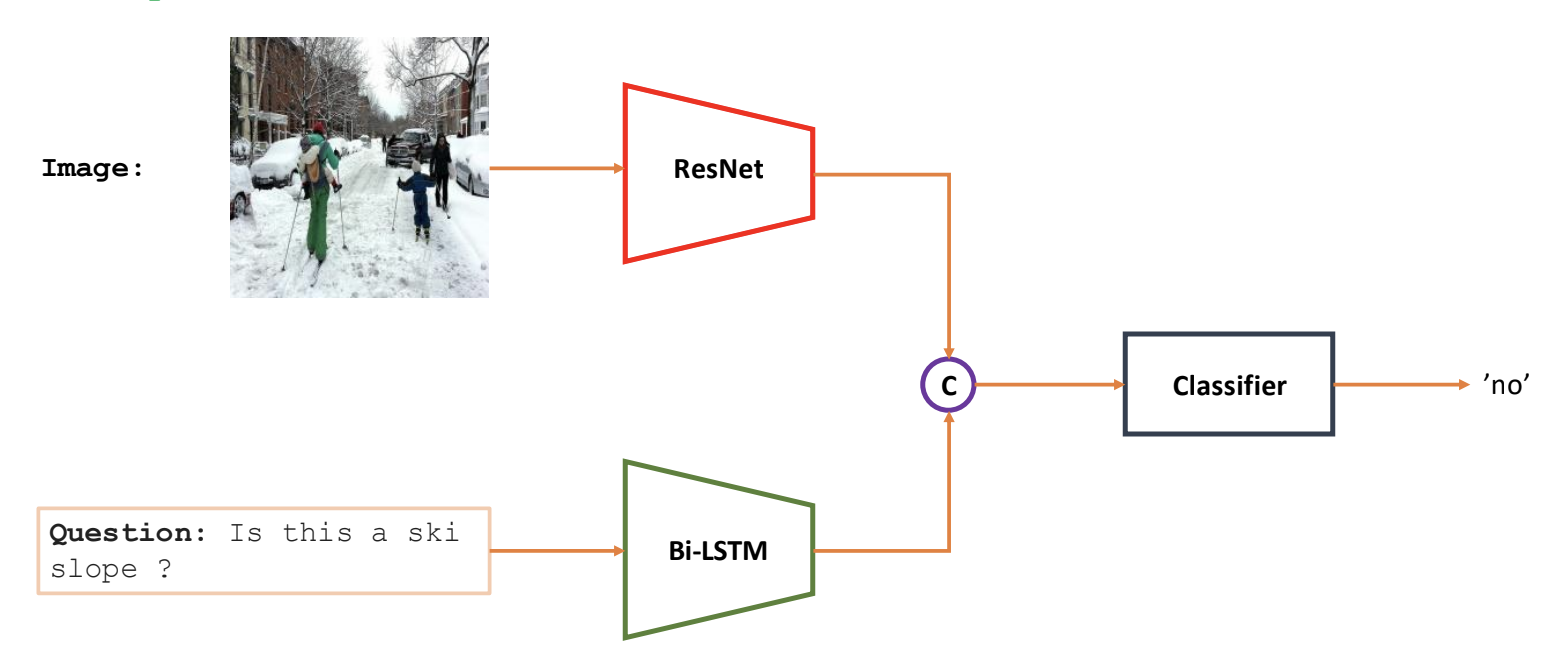

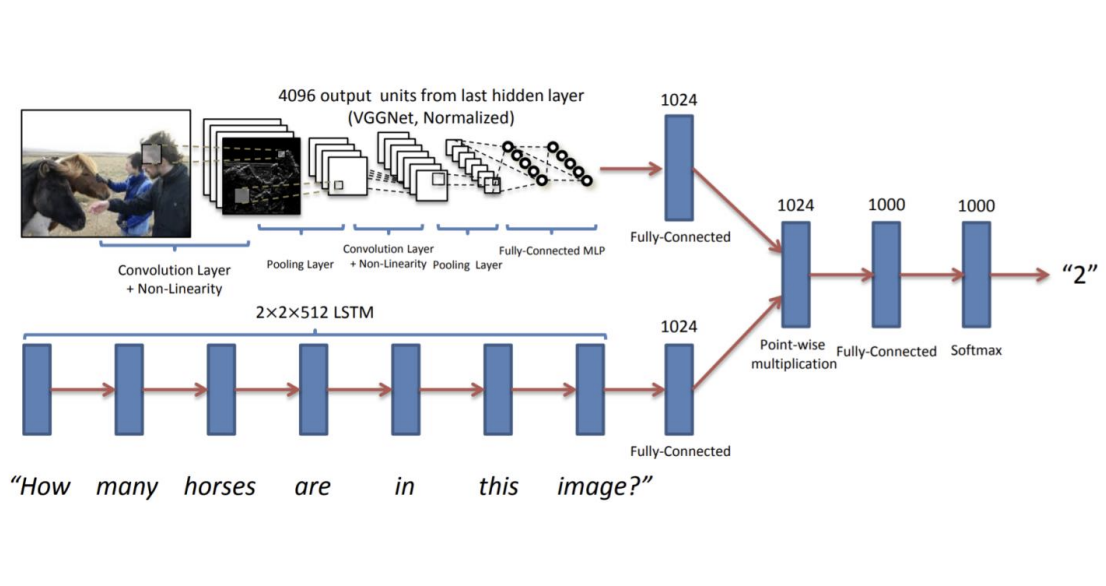

## **3.1. Model Architecture**
The VanillaVQA model for Visual Question Answering combines deep learning techniques to process visual and textual inputs for generating answers. Its architecture includes:


*   ***Image Processing:*** A pre-trained ResNet50 extracts features from images, transformed to a 1024-dimensional vector via a fully connected layer for standardization.
*   ***Text Processing:*** Questions are embedded and processed by a bidirectional LSTM, outputting a similarly transformed 1024-dimensional vector to align with image features.
*   ***Feature Combination:*** Image and text features are merged through element-wise multiplication, creating a unified representation of both modalities.
*   ***Classification:*** The combined features pass through layers (fully connected, ReLU, Dropout) and culminate in a final fully connected layer that predicts the answer from predefined classes.

In [ ]:
class VanillaVQA (nn.Module):
  def __init__ (
      self,
      vocab,
      n_classes,
      embedding_dims= 64,
      n_layers= 2,
      hidden_size= 128,
      dropout= 0.2
  ):
    super (VanillaVQA, self).__init__()

    # Image Feature Extractor
    self.image_encoder = timm.create_model(
        'resnet50', #ResNet50 Pre-trained
        pretrained= True,
        num_classes= hidden_size
    )
    self.image_fc = nn.Linear (hidden_size, 1024) # Fully Connected Layer: Transforms the image features from the ResNet50 model
                                                  # to a fixed size of 1024 dimensions

    # Text Feature Extractor
    self.embedding = nn.Embedding(len(vocab), embedding_dims) # Embedding Layer
    self.text_encoder = nn.LSTM(
        embedding_dims,
        hidden_size,
        num_layers= n_layers,
        bidirectional= True,
        batch_first= True
    ) # LSTM
    self.text_fc = nn.Linear(hidden_size * 2, 1024) # Fully Connected Layer

    # Classifier
    self.fc1 = nn.Linear(1024, 1000)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(dropout)
    self.fc2 = nn.Linear(1000, n_classes)

  # Feedforward
  def forward (self, img, text):
    # Get Image features
    img_features = self.image_encoder(img)
    img_features = self.image_fc (img_features)

    #Get Text features
    text_features = self.embedding (text)
    text_features, _ = self.text_encoder(text_features)
    text_features = text_features[:, -1, :]
    text_features = self.text_fc (text_features)

    # Combine Image and Text features
    x = img_features * text_features

    # Fully Connected
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)

    return x


## 3.2. Compile Model

In [ ]:
n_classes = len(classes)
img_model_name = 'resnet50'
hidden_size = 256
n_layers = 2
embeddding_dims = 128
dropout_prob = 0.2
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = VanillaVQA(
    n_classes=n_classes,
    vocab= vocab,
    embedding_dims=embeddding_dims,
    n_layers=n_layers,
    hidden_size=hidden_size,
    dropout=dropout_prob
).to(device)

images, questions, labels = next(iter(train_loader))

model.eval()
with torch.no_grad():
    images = images.to(device)
    questions = questions.to(device)
    output = model(images, questions)
    print(output.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

torch.Size([64, 2])


# 5. Training

## 5.1. Evaluation function

In [ ]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    losses = []
    with torch.no_grad():
        for image, question, labels in dataloader:
            image, question, labels = image.to(device), question.to(device), labels.to(device)
            outputs = model(image, question)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    loss = sum(losses) / len(losses)
    acc = correct / total

    return loss, acc

## 5.2. Training Function


*   Training: Activates model's training mode. For each epoch, processes data in batches - moving images, questions, and labels to the specified computing device. Then executes model forward passes with the current batch, calculates the loss using the specified criterion, and updates model parameters by performing backpropagation and optimization steps.
*   Validation: Switches the model to evaluation mode and assesses its performance on the validation dataset to compute validation loss and accuracy. Then records the validation loss for each epoch to monitor overfitting and model improvement over time.
*   Adjustment: Modifies the learning rate after each epoch according to a predefined schedule.
*   Logging: Prints a summary of training loss, validation loss, and accuracy after each epoch.
*   Output: Returns histories of training and validation losses for analysis.








In [ ]:
def fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    device,
    epochs
):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        batch_train_losses = []

        # Activates model's training mode.
        model.train()

        # iterates over training batches
        for idx, (images, questions, labels) in enumerate(train_loader):
            images = images.to(device)
            questions = questions.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images, questions)

            # calculates the loss
            loss = criterion(outputs, labels)

            # Backprobagation and optimization
            loss.backward()
            optimizer.step()

            batch_train_losses.append(loss.item())

        # Logging
        train_loss = sum(batch_train_losses) / len(batch_train_losses)
        train_losses.append(train_loss)

        val_loss, val_acc = evaluate(
            model, val_loader,
            criterion, device
        )
        val_losses.append(val_loss)

        print(f'EPOCH {epoch + 1}:\tTrain loss: {train_loss:.4f}\tVal loss: {val_loss:.4f}\tVal Acc: {val_acc}')

        scheduler.step()

    return train_losses, val_losses

In [ ]:
lr = 1e-2
epochs = 50

scheduler_step_size = epochs * 0.6
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr
)
scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=scheduler_step_size,
    gamma=0.1
)

In [ ]:
train_losses, val_losses = fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    device,
    epochs
)

EPOCH 1:	Train loss: 1.3875	Val loss: 0.6909	Val Acc: 0.5358606557377049
EPOCH 2:	Train loss: 0.6929	Val loss: 0.6908	Val Acc: 0.5358606557377049
EPOCH 3:	Train loss: 0.6928	Val loss: 0.6909	Val Acc: 0.5358606557377049
EPOCH 4:	Train loss: 0.6928	Val loss: 0.6911	Val Acc: 0.5358606557377049
EPOCH 5:	Train loss: 0.6928	Val loss: 0.6913	Val Acc: 0.5358606557377049
EPOCH 6:	Train loss: 0.6928	Val loss: 0.6913	Val Acc: 0.5358606557377049
EPOCH 7:	Train loss: 0.6930	Val loss: 0.6916	Val Acc: 0.5358606557377049
EPOCH 8:	Train loss: 0.6928	Val loss: 0.6910	Val Acc: 0.5358606557377049
EPOCH 9:	Train loss: 0.6927	Val loss: 0.6928	Val Acc: 0.5358606557377049
EPOCH 10:	Train loss: 0.6928	Val loss: 0.6907	Val Acc: 0.5358606557377049
EPOCH 11:	Train loss: 0.6929	Val loss: 0.6919	Val Acc: 0.5358606557377049
EPOCH 12:	Train loss: 0.6928	Val loss: 0.6909	Val Acc: 0.5358606557377049
EPOCH 13:	Train loss: 0.6927	Val loss: 0.6917	Val Acc: 0.5358606557377049
EPOCH 14:	Train loss: 0.6929	Val loss: 0.6913	V

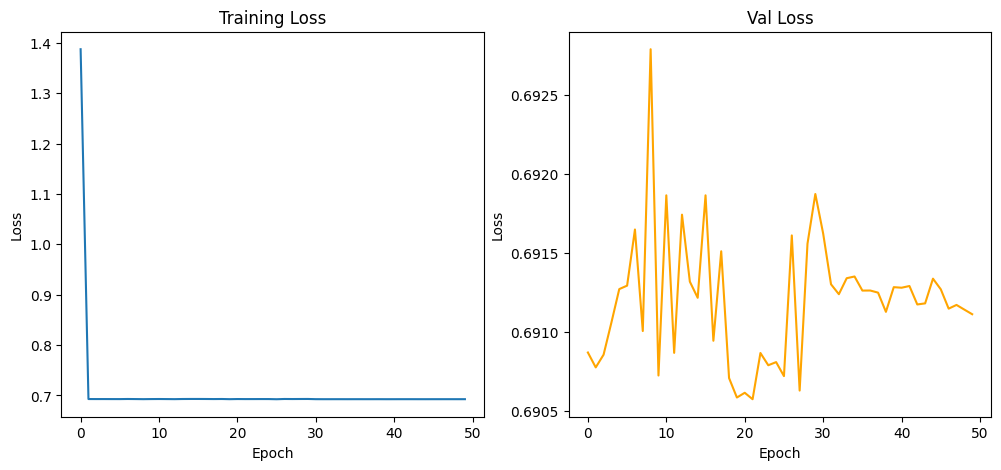

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(train_losses)
ax[0].set_title('Training Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].plot(val_losses, color='orange')
ax[1].set_title('Val Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
val_loss, val_acc = evaluate(
    model,
    val_loader,
    criterion,
    device
)
test_loss, test_acc = evaluate(
    model,
    test_loader,
    criterion,
    device
)

print('Evaluation on val/test dataset')
print('Val accuracy: ', val_acc)
print('Test accuracy: ', test_acc)

Evaluation on val/test dataset
Val accuracy:  0.5358606557377049
Test accuracy:  0.5489614243323442


# 6. Model Demo

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00


In [ ]:
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from torchvision import transforms
from PIL import Image
import torch
import spacy

# Load your Spacy model for tokenization
eng = spacy.load("en_core_web_sm")

# Assume 'model', 'vocab', 'idx_to_classes' are already defined and loaded
# Make sure to move your model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def preprocess_image(image_bytes, transform):
    image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    image = image.to(device)
    return image

def preprocess_question(question, vocab, max_seq_len=20):
    tokens = [token.text for token in eng.tokenizer(question)]
    sequence = []
    for token in tokens:
        # Attempt to get the index of the token from vocab
        # Fallback to a predefined index for unknown tokens if the token is not found
        token_index = vocab[token] if token in vocab else vocab['<unk>']
        sequence.append(token_index)
    if len(sequence) < max_seq_len:
        sequence += [vocab['<pad>']] * (max_seq_len - len(sequence))
    else:
        sequence = sequence[:max_seq_len]
    question_tensor = torch.tensor(sequence).unsqueeze(0)  # Add batch dimension
    question_tensor = question_tensor.to(device)
    return question_tensor


def predict_answer(model, image_bytes, question, transform, vocab, idx_to_classes, device):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        image = preprocess_image(image_bytes, transform)
        question_tensor = preprocess_question(question, vocab)

        output = model(image, question_tensor)
        prediction = output.argmax(dim=1).item()

        answer = idx_to_classes[prediction]
        return answer

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Widgets setup
uploader = widgets.FileUpload(accept='image/*', multiple=False)
question_input = widgets.Text(placeholder='Type your question here', description='Question:', disabled=False)
predict_button = widgets.Button(description="Predict")
clear_button = widgets.Button(description="Clear Image")
output_area = widgets.Output()

def on_predict_button_clicked(b):
    with output_area:
        clear_output()
        if not uploader.value:
            print("No image uploaded!")
            return
        if not question_input.value.strip():
            print("Please enter a question.")
            return

        # Display the uploaded image
        image_info = next(iter(uploader.value.values()))
        image_bytes = image_info['content']
        image = Image.open(io.BytesIO(image_bytes))
        display(image.resize((224, 224)))  # Resize for display purposes

        # Predict the answer
        question = question_input.value
        answer = predict_answer(model, image_bytes, question, transform, vocab, idx_to_classes, device)

        # Display the answer
        print(f"Answer: {answer}")

def on_clear_button_clicked(b):
    # Clear the uploader widget and any displayed output
    uploader.value.clear()
    uploader._counter = 0
    with output_area:
        clear_output()
        print("Image cleared. Upload a new image.")

predict_button.on_click(on_predict_button_clicked)
clear_button.on_click(on_clear_button_clicked)



/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
def display_result (uploader, question_input, predict_button, clear_button, output_area):
  # Display widgets
  display(uploader, question_input, predict_button, clear_button, output_area)

In [ ]:
display_result (uploader, question_input, predict_button, clear_button, output_area)

FileUpload(value={}, accept='image/*', description='Upload')

Text(value='', description='Question:', placeholder='Type your question here')

Button(description='Predict', style=ButtonStyle())

Button(description='Clear Image', style=ButtonStyle())

Output()